### Edgar Moises Hernandez-Gonzalez
#### 28/03/20-04/04/20
#### Clasificacion de imagenes Fashion Mnist con CNN y CNN-BN
##### Explorando datos y haciendo predicciones
##### El mejor clasificador fue CNN-BN con 91% de accuracy

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, Flatten, Dense,
                                     Dropout, BatchNormalization, Activation)

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['Camiseta / top', 'Pantalon', 'Pull-over', 'Vestido', 'Saco',
               'Sandalia', 'Camisa', 'Zapatilla de deporte', 'Bolso', 'Botín']

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 60000
n_samples_test : 10000


In [6]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [7]:
print(np.max(x_train))
print(np.max(x_test))
print(np.min(x_train))
print(np.min(x_test))
print(np.mean(x_train))
print(np.mean(x_test))

255
255
0
0
72.94035223214286
73.14656658163265


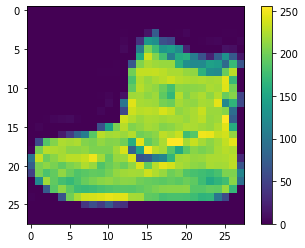

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

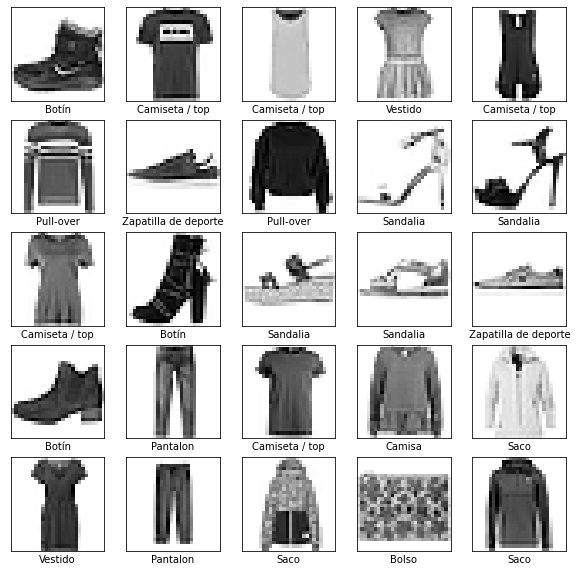

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [11]:
print(np.max(x_train))
print(np.max(x_test))
print(np.min(x_train))
print(np.min(x_test))
print(np.mean(x_train))
print(np.mean(x_test))

1.0
1.0
0.0
0.0
0.2860402
0.28684944


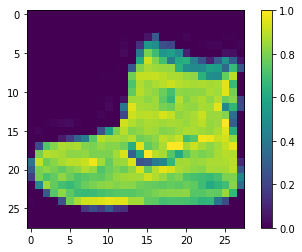

In [12]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

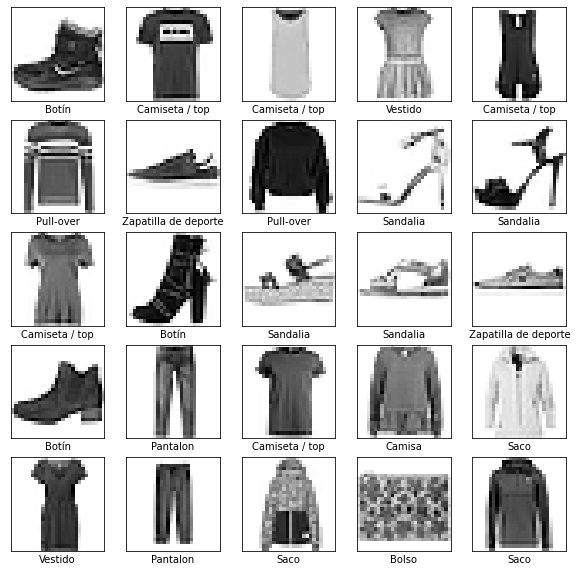

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [14]:
#convertir de 3D a 4D
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
def cnn_2d():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu',
                   input_shape=x_train.shape[1:]))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [0]:
def cnn_2d_bn():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPool2D((2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(n_classes, activation='softmax'))

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [0]:
model = cnn_2d_bn()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0

In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/5
1875/1875 - 6s - loss: 0.4122 - accuracy: 0.8524 - val_loss: 0.3285 - val_accuracy: 0.8808
Epoch 2/5
1875/1875 - 6s - loss: 0.2812 - accuracy: 0.8974 - val_loss: 0.3133 - val_accuracy: 0.8869
Epoch 3/5
1875/1875 - 6s - loss: 0.2430 - accuracy: 0.9105 - val_loss: 0.2702 - val_accuracy: 0.9034
Epoch 4/5
1875/1875 - 6s - loss: 0.2159 - accuracy: 0.9201 - val_loss: 0.2645 - val_accuracy: 0.9033
Epoch 5/5
1875/1875 - 6s - loss: 0.1923 - accuracy: 0.9283 - val_loss: 0.2691 - val_accuracy: 0.9050


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.2691 - accuracy: 0.9050
Test loss: 0.26909002661705017
Test accuracy: 0.9049999713897705


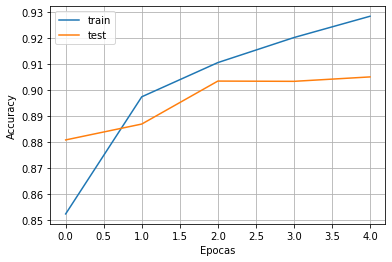

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

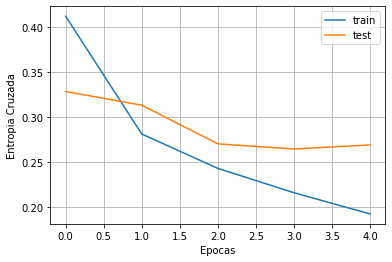

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [24]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[846   1  21   9   5   0 107   0  11   0]
 [  5 970   0  12   3   0   8   0   2   0]
 [ 13   0 847   4  81   0  54   0   1   0]
 [ 23   2  16 859  68   0  32   0   0   0]
 [  1   0  30   8 921   0  40   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [101   0  51  16  97   0 725   0  10   0]
 [  0   0   0   0   0  10   0 954   0  36]
 [  3   2   3   1   3   4   4   2 977   1]
 [  1   0   0   0   0   7   1  26   0 965]]


In [25]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.85      0.86      1000
           3       0.94      0.86      0.90      1000
           4       0.78      0.92      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.72      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img.reshape(28,28), cmap='Greys')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [28]:
num_test = 28
print("Etiqueta verdadera", y_test[num_test])
prediccion = model.predict(x_test[num_test].reshape(1,28,28,1))
print("Etiqueta predicha", prediccion.argmax())

Etiqueta verdadera 9
Etiqueta predicha 9


In [29]:
#Forma facil de predecir la clase
model.predict_classes(x_test[num_test].reshape(1,28,28,1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9])

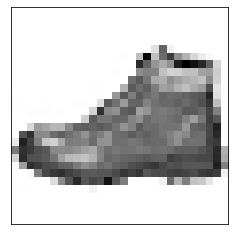

In [30]:
plt.imshow(x_test[num_test].reshape(28,28), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
# este solo sirve para el primer dato osea y_test[0]
#plot_value_array(0, prediccion, y_test) #0 porque solo es una prediccion
#plt.xticks(range(10), class_names, rotation=45)
#plt.show()

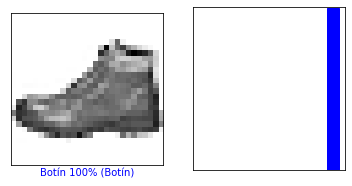

In [32]:
i = num_test
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, probabilidades, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, probabilidades,  y_test)
plt.show()

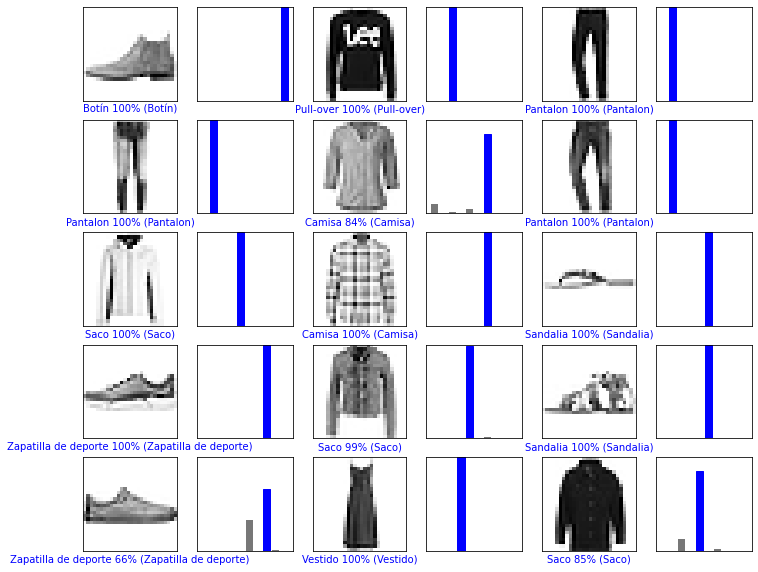

In [33]:
#Graficar imagenes, etiqueta predicha y etiqueta verdadera
#Correcta en azul, incorrecta en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, probabilidades, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, probabilidades, y_test)
plt.show()